In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
df.shape

(955339, 28)

In [5]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
countNum=0
countObj=0
for cols in df.dtypes:
    if(cols=='int64'or cols=='float64'):
        countNum+=1
    if(cols==object):
        countObj+=1
print(countNum)
print(countObj)

15
13


In [7]:
# count_question_marks = (df.map(lambda x: x == '?')).sum().sum()
# print(count_question_marks)
# count_nan_values=(df.map(lambda x:x=='NaN')).sum().sum()
# print(count_nan_values)
# missing_data_counts=df.isnull().sum()
# print(missing_data_counts)
# missing_data=df.isnull()
# for column in missing_data.columns.values.tolist():
    # print(column)
    # print(missing_data[column].value_counts())
    # print(" ")
    # if(missing_data[column].any()):
    #     print(column)
    #     print(df[column].dtypes)

In [8]:
missing_data=df.isnull()
missing_data_counts=missing_data.sum()
print(missing_data_counts)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           136675
Vict Age               0
Vict Sex          130045
Vict Descent      130055
Premis Cd             12
Premis Desc          569
Weapon Used Cd    630320
Weapon Desc       630320
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          886873
Crm Cd 3          953045
Crm Cd 4          955275
LOCATION               0
Cross Street      806439
LAT                    0
LON                    0
dtype: int64


In [9]:

for column in missing_data.columns.values.tolist():
      if(missing_data[column].any()):
        print(column)
        print(df[column].dtypes)

Mocodes
object
Vict Sex
object
Vict Descent
object
Premis Cd
float64
Premis Desc
object
Weapon Used Cd
float64
Weapon Desc
object
Status
object
Crm Cd 1
float64
Crm Cd 2
float64
Crm Cd 3
float64
Crm Cd 4
float64
Cross Street
object


##next step
Checking for column Mocodes.

In [10]:
df['Mocodes'].head(20)

0                                    NaN
1                         1822 1402 0344
2                              0344 1251
3                              0325 1501
4                    1822 1501 0930 2004
5                    1822 0100 0930 0929
6                              0930 0929
7                                   0100
8                                   0100
9                                   0416
10                             1822 0930
11         0913 2024 1817 0360 1258 0507
12    1251 1258 0913 0400 0500 0522 1817
13                                   NaN
14         2000 1251 1259 0522 0507 0913
15              0100 0928 0929 0935 1822
16                             0928 1822
17                                  0100
18                             1309 0400
19                        2041 1906 1822
Name: Mocodes, dtype: object

As the datatype of this column is object and there is no any 
specific term repeating or like that, so we have to simply drop
the missing rows.

In [11]:
#dropping the missing rows of Mocodes column
df.dropna(subset=['Mocodes'],axis=0,inplace=True)

#reset index,because we dropped some rows
df.reset_index(drop=True,inplace=True)

checking for the column vict sex

In [12]:
df['Vict Sex'].head(10)

0    M
1    X
2    M
3    M
4    M
5    M
6    F
7    F
8    M
9    M
Name: Vict Sex, dtype: object

We can replace the missing row in Vict sex as the mode of 
the column

In [13]:
maxCount=df['Vict Sex'].value_counts().idxmax()
print(maxCount)

M


So Crime against Male is the max, so we will replace the missing
rows with male

In [14]:
df['Vict Sex']=df['Vict Sex'].replace(np.nan,"M")

In [15]:
missing_data['Vict Sex'].head(30)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27     True
28    False
29    False
Name: Vict Sex, dtype: bool

So Vict Sex column is handled successfully.

Checking for Victim Descent

In [16]:
df['Vict Descent'].value_counts()

Vict Descent
H    285978
W    190914
B    131513
X     97082
O     74372
A     20623
K      5333
F      4188
C      3929
J      1367
V      1042
I       918
Z       490
P       257
U       174
D        82
G        67
L        66
S        51
-         2
Name: count, dtype: int64

We should replace the missing rows with H

In [17]:
df['Vict Descent']=df['Vict Descent'].replace(np.nan,"H")

In [18]:
missing_data['Vict Descent'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Vict Descent, dtype: bool

Checking for Premis Cd

In [19]:
df['Premis Cd'].head()

0    128.0
1    502.0
2    405.0
3    102.0
4    501.0
Name: Premis Cd, dtype: float64

We should replace the missing rows with the mean

In [20]:
Premis_Cd_mean=df['Premis Cd'].astype('float').mean(axis=0)
df['Premis Cd']=df['Premis Cd'].replace(np.nan,Premis_Cd_mean)

Using same technique for other columns.

In [21]:
df.dropna(subset=['Premis Desc','Weapon Desc','Status','Cross Street'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [22]:
Weapon_Used_Cd_mean=df['Weapon Used Cd'].astype('float').mean(axis=0)
Crm_Cd_1_mean=df['Crm Cd 1'].astype('float').mean(axis=0)
Crm_Cd_2_mean=df['Crm Cd 2'].astype('float').mean(axis=0)
Crm_Cd_3_mean=df['Crm Cd 3'].astype('float').mean(axis=0)
Crm_Cd_4_mean=df['Crm Cd 4'].astype('float').mean(axis=0)

In [53]:
df.replace({'Weapon Used Cd':{Weapon_Used_Cd_mean}},inplace=True)
# df.replace({'Crm Cd 1':{Crm_Cd_1_mean}},inplace=True)
df['Crm Cd 1']=df['Crm Cd 1'].replace(np.nan,Crm_Cd_1_mean)
df['Crm Cd 2']=df['Crm Cd 2'].replace(np.nan,Crm_Cd_2_mean)
df['Crm Cd 3']=df['Crm Cd 3'].replace(np.nan,Crm_Cd_3_mean)
df['Crm Cd 4']=df['Crm Cd 4'].replace(np.nan,Crm_Cd_4_mean)

Now removing the duplicates

In [24]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

Graphs 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,220313293,07/06/2022 12:00:00 AM,06/30/2020 12:00:00 AM,1400,3,Southwest,396,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626.0,NaN,NaN,NaN,VERMONT AV,43RD ST,34.0055,-118.2915
1,221016479,11/14/2022 12:00:00 AM,07/24/2020 12:00:00 AM,1500,10,West Valley,1017,1,761,BRANDISH WEAPON,...,IC,Invest Cont,761.0,NaN,NaN,NaN,SHERMAN WY,ENCINO,34.2012,-118.5133
2,221011289,07/05/2022 12:00:00 AM,03/01/2020 12:00:00 AM,1200,10,West Valley,1001,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AA,Adult Arrest,626.0,NaN,NaN,NaN,SHIRLEY,ROSCOE BL,34.2204,-118.5579
3,231305562,02/01/2023 12:00:00 AM,04/01/2020 12:00:00 AM,2300,13,Newton,1303,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,12TH ST,SAN PEDRO ST,34.0337,-118.2533
4,220606971,03/05/2022 12:00:00 AM,07/02/2020 12:00:00 AM,940,6,Hollywood,636,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AO,Adult Other,230.0,NaN,NaN,NaN,YUCCA ST,HIGHLAND AV,34.1032,-118.3387


For Numerical variable regression plot is best for analysis

(0.0, 2476.9)

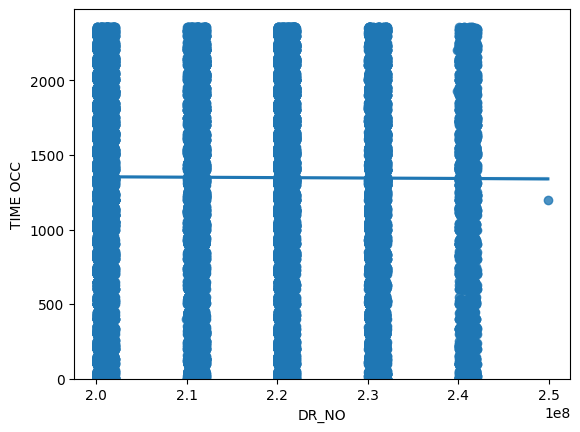

In [27]:
#regression plot between DR_NO and time_occ
sns.regplot(x="DR_NO",y="TIME OCC",data=df)
plt.ylim(0,)

The regression plot shows almost no dependence between both
the variables.

(0.0, 104.05)

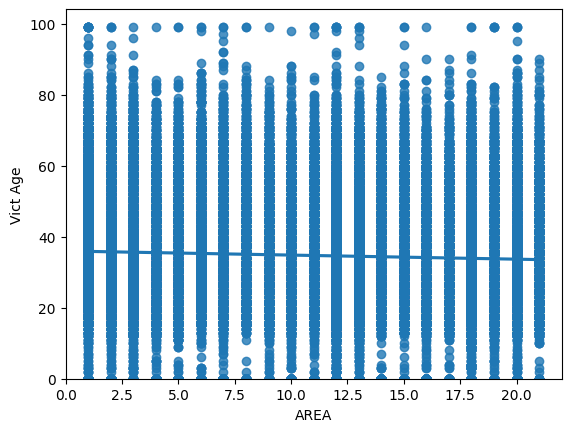

In [28]:
#regression plot between area and victim age
sns.regplot(x="AREA",y="Vict Age",data=df)
plt.ylim(0,)

This shows a weak negative linear relationship between area and 
the age of victim.

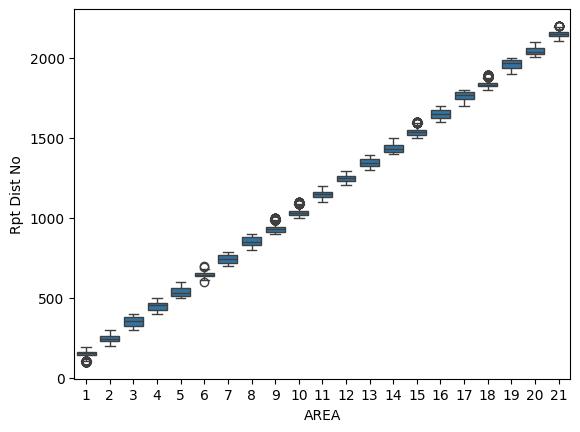

In [29]:
#a boxplot between area and rept dist. no
sns.boxplot(x='AREA',y='Rpt Dist No',data=df)
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_23436\1938872051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vict Age'], hist=True)


<Axes: xlabel='Vict Age', ylabel='Density'>

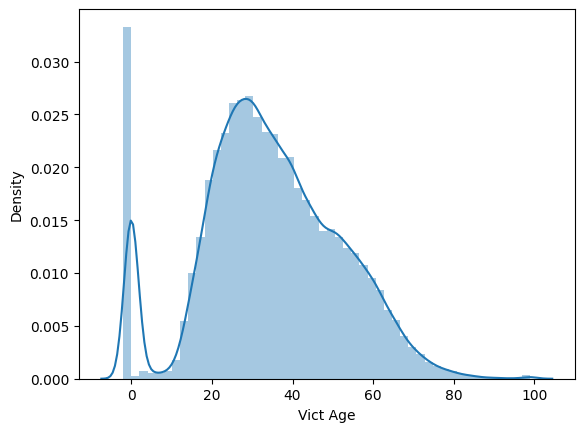

In [30]:
#kde plot for age
sns.distplot(df['Vict Age'], hist=True)

Near about the 30 years the probabilty of finding a victim is Max.

<Axes: xlabel='Vict Age', ylabel='Count'>

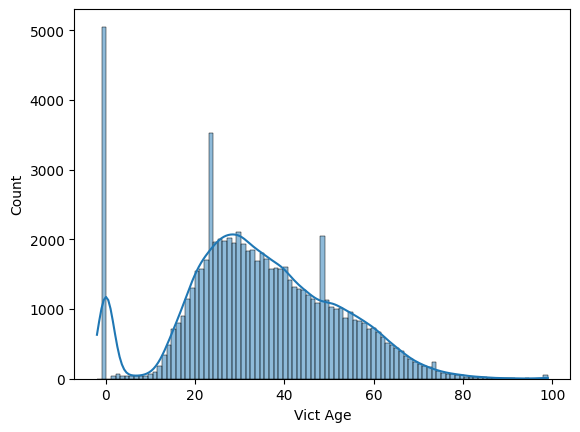

In [31]:
sns.histplot(df['Vict Age'], kde=True)

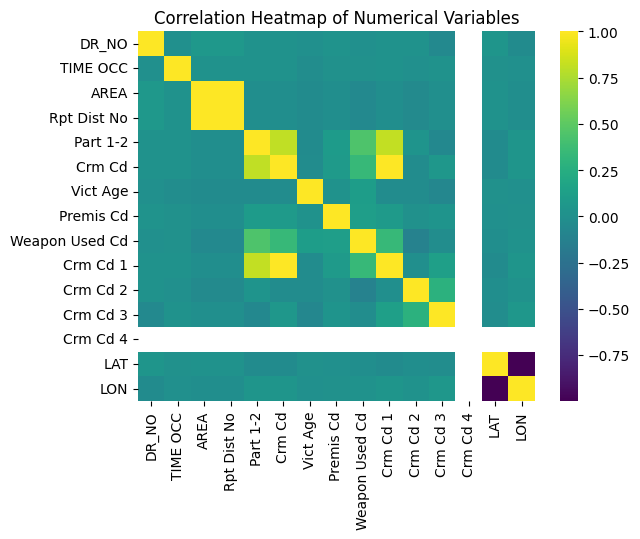

In [42]:
#heatmap for different numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

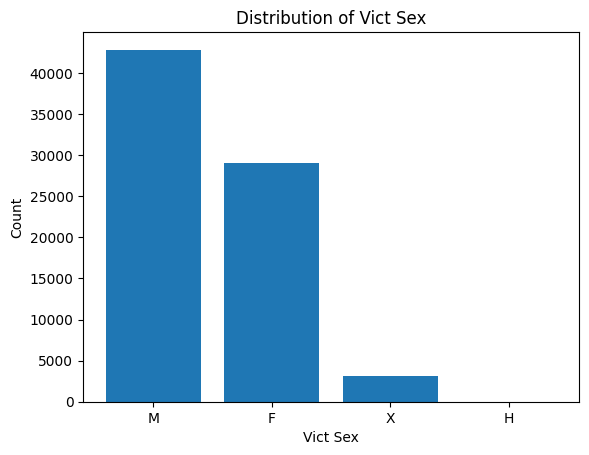

In [40]:
#bar graph of gender of victim
counts=df['Vict Sex'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Vict Sex')
plt.ylabel('Count')
plt.title('Distribution of Vict Sex')
plt.show()

<Axes: xlabel='Vict Descent', ylabel='Count'>

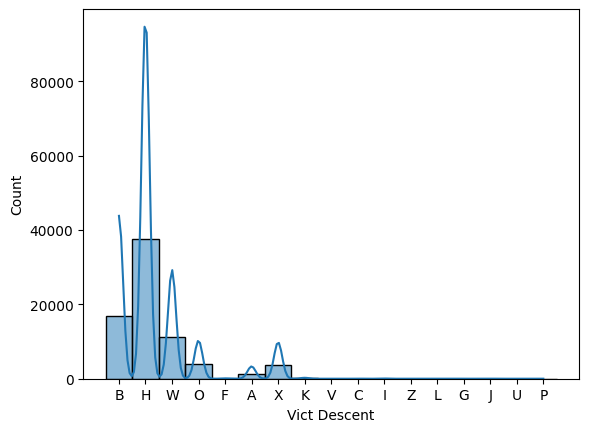

In [43]:
sns.histplot(df['Vict Descent'],kde=True)

In [44]:
#creating a correlation matrix between all the numerical variables
numerical_cols=df.select_dtypes(include=['int64','float64'])
corr_matrix=numerical_cols.corr()
corr_matrix

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.005225,0.063594,0.064139,0.011627,0.011049,-0.003657,0.029302,-0.004196,0.011083,0.013518,-0.054127,NaN,0.042019,-0.041063
TIME OCC,-0.005225,1.000000,0.016837,0.016929,0.020045,0.018279,-0.029279,0.002456,0.003121,0.018385,-0.002013,0.021429,NaN,0.002944,-0.003075
AREA,0.063594,0.016837,1.000000,0.999195,-0.015521,-0.019574,-0.042716,-0.022195,-0.057376,-0.019971,-0.046877,-0.011847,NaN,0.020116,-0.015677
Rpt Dist No,0.064139,0.016929,0.999195,1.000000,-0.015376,-0.019575,-0.042679,-0.022128,-0.057118,-0.019974,-0.047327,-0.010730,NaN,0.020134,-0.015735
Part 1-2,0.011627,0.020045,-0.015521,-0.015376,1.000000,0.811966,-0.040393,0.090889,0.439597,0.813324,0.039612,-0.069057,NaN,-0.042725,0.044558
Crm Cd,0.011049,0.018279,-0.019574,-0.019575,0.811966,1.000000,-0.033501,0.081491,0.337796,0.998536,-0.031566,0.056596,NaN,-0.039502,0.041528
Vict Age,-0.003657,-0.029279,-0.042716,-0.042679,-0.040393,-0.033501,1.000000,0.018495,0.108694,-0.032272,-0.036433,-0.069802,NaN,0.007631,-0.006857
Premis Cd,0.029302,0.002456,-0.022195,-0.022128,0.090889,0.081491,0.018495,1.000000,0.112730,0.082031,0.007235,0.037662,NaN,-0.005044,0.005909
Weapon Used Cd,-0.004196,0.003121,-0.057376,-0.057118,0.439597,0.337796,0.108694,0.112730,1.000000,0.338517,-0.116993,-0.028806,NaN,-0.017883,0.020564
Crm Cd 1,0.011083,0.018385,-0.019971,-0.019974,0.813324,0.998536,-0.032272,0.082031,0.338517,1.000000,-0.010472,0.120733,NaN,-0.039769,0.041791


In [46]:
#plotting a cross tabulation table
cross_tab=pd.crosstab(df['Date Rptd'],df['DATE OCC'])
print(cross_tab)

DATE OCC                01/01/2020 12:00:00 AM  01/01/2021 12:00:00 AM  \
Date Rptd                                                                
01/01/2020 12:00:00 AM                      50                       0   
01/01/2021 12:00:00 AM                       0                      31   
01/01/2022 12:00:00 AM                       0                       0   
01/01/2023 12:00:00 AM                       0                       0   
01/01/2024 12:00:00 AM                       0                       0   
...                                        ...                     ...   
12/30/2023 12:00:00 AM                       0                       0   
12/31/2020 12:00:00 AM                       0                       0   
12/31/2021 12:00:00 AM                       0                       0   
12/31/2022 12:00:00 AM                       0                       0   
12/31/2023 12:00:00 AM                       0                       0   

DATE OCC                01/01/2022 12

We can also find the pearson correlation coefficient for more 
analysis of correlation between two numerical variables.

In [47]:
from scipy import stats

In [50]:
pearson_coef,p_value=stats.pearsonr(df['DR_NO'],df['AREA'])
print("The pearson Correlation coefficient is ",pearson_coef," with a P value of ",p_value)

The pearson Correlation coefficient is  0.06359350979458192  with a P value of  3.756729958427244e-68


In [55]:
pearson_coef,p_value=stats.pearsonr(df['Vict Age'],df['Crm Cd 1'])
print("The pearson Correlation coefficient is ",pearson_coef," with a P value of ",p_value)

The pearson Correlation coefficient is  -0.032271401046530535  with a P value of  9.067038794834572e-19


Conclusion:
The data set was first cleaned and then all the columns were 
analysed agains each other and individually. The dependence of different variables are 
checked and clearly stated.